In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import sys 
from warnings import filterwarnings as filt

filt('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('dark_background')

#### data initialization 

In [25]:
base_path   = "../input/face-images/lfw-dataset"
base_path2  = "../input/lfw-dataset"
images_path = os.path.join(base_path, 'lfw-deepfunneled', 'lfw-deepfunneled')
pairs_path = os.path.join(base_path2, 'pairs.csv')
mismatch_tr_path = os.path.join(base_path2, 'mismatchpairsDevTrain.csv')
mismatch_vl_path = os.path.join(base_path2, 'mismatchpairsDevTest.csv')

In [26]:
pairs = pd.read_csv(pairs_path)
mismatch_tr = pd.read_csv(mismatch_tr_path)
mismatch_vl = pd.read_csv(mismatch_vl_path)

In [27]:
print(f'pairs shape          : {pairs.shape}')
print(f'mismatch train shape : {mismatch_tr.shape}')
print(f'mismatch dev   shape : {mismatch_vl.shape}')

pairs shape          : (6000, 4)
mismatch train shape : (1100, 4)
mismatch dev   shape : (500, 4)


In [28]:
pairs.head()

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN
2,Akhmed_Zakayev,2,3,NaN
3,Amber_Tamblyn,1,2,NaN
4,Anders_Fogh_Rasmussen,1,3,NaN


In [29]:
pairs['Unnamed: 3'].unique()

array([nan,  1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 16., 25., 22., 23.,
       32., 18., 50., 64., 11., 12.,  9., 17., 55., 34., 27., 28., 14.,
       10., 42.])

In [30]:
mismatch_tr.head()

,name,imagenum1,name.1,imagenum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1
3,Abdoulaye_Wade,4,Linda_Dano,1
4,Abdul_Rahman,1,Magui_Serna,1


In [31]:
mismatch_vl.head()

,name,imagenum1,name.1,imagenum2
0,AJ_Lamas,1,Zach_Safrin,1
1,Aaron_Guiel,1,Reese_Witherspoon,3
2,Aaron_Tippin,1,Jose_Luis_Rodriguez_Zapatero,1
3,Abdul_Majeed_Shobokshi,1,Charles_Cope,1
4,Abdullah_Gul,16,Steve_Cox,1


#### feature engg and data cleaning 

In [32]:
mismatch_pair = pd.concat([mismatch_tr, mismatch_vl])
mismatch_pair.shape

(1600, 4)

In [33]:
mismatch_pair.head()

,name,imagenum1,name.1,imagenum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1
3,Abdoulaye_Wade,4,Linda_Dano,1
4,Abdul_Rahman,1,Magui_Serna,1


In [34]:
pairs.columns.values

array(['name', 'imagenum1', 'imagenum2', 'Unnamed: 3'], dtype=object)

##### matching pairs

In [35]:
new_cols = ['name1', 'imgnum1', 'name2', 'imgnum2']
pcol = pairs.columns.values
mcol = mismatch_pair.columns.values

pairs = pairs.rename(columns = {
    pcol[0] : new_cols[0],
    pcol[1] : new_cols[1],
    pcol[2] : new_cols[3],
    pcol[3] : new_cols[2]
})

pairs['name2'] = pairs['name1']

pairs.head()

,name1,imgnum1,imgnum2,name2
0,Abel_Pacheco,1,4,Abel_Pacheco
1,Akhmed_Zakayev,1,3,Akhmed_Zakayev
2,Akhmed_Zakayev,2,3,Akhmed_Zakayev
3,Amber_Tamblyn,1,2,Amber_Tamblyn
4,Anders_Fogh_Rasmussen,1,3,Anders_Fogh_Rasmussen


In [36]:
pairs.shape

(6000, 4)

In [37]:
pairs.imgnum2.unique()

array(['4', '3', '2', ..., 'Ringo_Starr', 'Tocker_Pudwill',
       'Virgina_Ruano_Pascal'], dtype=object)

In [38]:
pairs.imgnum1.unique()

array([  1,   2,   3,   6,  10,   4,   5,   7,   9,  21,  27,  36,  41,
        45,   8,  17,  14,  16,  18,  24,  12,  23,  26,  33,  60,  11,
        13,  15,  20,  19,  32,  53,  91,  92, 105,  31,  22,  35,  40,
        49, 133, 182,  95,  66,  39,  51,  28,  29,  34,  25, 145, 203,
        42,  30])

In [39]:
pairs.shape[0], pairs.shape[0] - np.sum(pairs.imgnum2.apply(lambda x : x.isdigit()))

(6000, 3000)

50% of the matching pairs are not numbered and instead given an name, replacing it with same number as the imgnum1

In [40]:
for ind,rdf in pairs.iterrows():
    num1, num2 = rdf['imgnum1'], rdf['imgnum2']
    if not num2.isdigit():
        pairs.iloc[ind, 2] = num1
    else:
        pairs.iloc[ind, 2] = int(num2)
        
pairs.head()

,name1,imgnum1,imgnum2,name2
0,Abel_Pacheco,1,4,Abel_Pacheco
1,Akhmed_Zakayev,1,3,Akhmed_Zakayev
2,Akhmed_Zakayev,2,3,Akhmed_Zakayev
3,Amber_Tamblyn,1,2,Amber_Tamblyn
4,Anders_Fogh_Rasmussen,1,3,Anders_Fogh_Rasmussen


In [41]:
pairs.imgnum2.unique()

array([4, 3, 2, 5, 10, 11, 9, 6, 7, 12, 13, 22, 26, 27, 53, 51, 50, 56, 8,
       24, 14, 21, 15, 16, 17, 18, 37, 36, 30, 25, 1, 33, 60, 29, 31, 43,
       28, 23, 32, 86, 48, 110, 102, 134, 133, 121, 20, 35, 39, 71, 234,
       170, 198, 42, 19, 95, 67, 100, 38, 83, 40, 52, 44, 41, 47, 55, 45,
       65, 482, 150, 238, 247, 34], dtype=object)

In [42]:
pairs.head()

,name1,imgnum1,imgnum2,name2
0,Abel_Pacheco,1,4,Abel_Pacheco
1,Akhmed_Zakayev,1,3,Akhmed_Zakayev
2,Akhmed_Zakayev,2,3,Akhmed_Zakayev
3,Amber_Tamblyn,1,2,Amber_Tamblyn
4,Anders_Fogh_Rasmussen,1,3,Anders_Fogh_Rasmussen


In [43]:
n = 'Abel_Pacheco'
pairs[pairs.name1 == n]

,name1,imgnum1,imgnum2,name2
0,Abel_Pacheco,1,4,Abel_Pacheco
304,Abel_Pacheco,1,1,Abel_Pacheco
305,Abel_Pacheco,2,2,Abel_Pacheco


In [44]:
def generate_match_pairs(df):
    match_pairs = []
    names = df.name1.unique()
    for name in names:
        path = os.path.join(images_path, name)
        images = os.listdir(path)
        leng = len(images)
        for num1 in range(leng):
            for num2 in range(leng):
                match_pairs.append([name, num1 + 1, num2 + 1, name, 1])
                
    return pd.DataFrame(match_pairs, columns = ['name1', 'imgnum1', 'imgnum2', 'name2', 'match']).sample(frac = 1.0).reset_index(drop = True)

In [45]:
pairs2 = generate_match_pairs(pairs)
pairs2.head()

,name1,imgnum1,imgnum2,name2,match
0,George_W_Bush,22,363,George_W_Bush,1
1,George_W_Bush,462,172,George_W_Bush,1
2,George_W_Bush,80,434,George_W_Bush,1
3,George_W_Bush,377,67,George_W_Bush,1
4,Colin_Powell,32,201,Colin_Powell,1


In [46]:
pairs2.shape

(494188, 5)

In [47]:
pairs = pd.concat([pairs, pairs2])
pairs.shape

(500188, 5)

##### mismatch pairs

In [48]:
mismatch_pair = mismatch_pair.rename(columns = {mcol[i] : new_cols[i] for i in range(len(new_cols))})
mismatch_pair.head()

,name1,imgnum1,name2,imgnum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1
3,Abdoulaye_Wade,4,Linda_Dano,1
4,Abdul_Rahman,1,Magui_Serna,1


In [49]:
mismatch_pair.imgnum2.unique()

array([ 1,  5,  3,  2,  7,  4,  6, 18,  8,  9, 25, 27, 13, 11, 10, 19, 15,
       23])

In [50]:
mismatch_pair.shape

(1600, 4)

In [51]:
mismatch_pair[mismatch_pair.name1 == 'Marsha_Thomason']

,name1,imgnum1,name2,imgnum2


In [52]:
# mismatch_pair.name1.unique().shape, mismatch_pair.shape[0] * 5 - mismatch_pair.shape[0]

In [53]:
def generate_mismatch_pairs(df, num_mismatches = 5, total_mismatches = 6000):
    mismatch_pairs = []
    names          = {}
    npdf             = df.values
    
    # updating the names dict      
    for ind, (n1, num1, n2, num2) in enumerate(npdf):
        try:
            names[n1].append(num1)
        except KeyError:
            names[n1] = [num1]
        
        try:
            names[n2].append(num2)
        except KeyError:
            names[n2] = [num2]
    
    npdf = df.sample(frac = 1.0).values
    for (n1, num1, n2, num2) in npdf:
        temp_names = [i for i in names.keys() if (i != n1 or i != n2)]
        verifications = np.random.choice(temp_names, num_mismatches, replace = False)
        verification_nums = [np.random.choice(names[verification], replace = False) for verification in verifications]
        for i in range(len(verifications)):
            mismatch_pairs.append([n1, num1, verifications[i], verification_nums[i]])
        
        if len(mismatch_pairs) >= total_mismatches:
            break
            
    return pd.DataFrame(mismatch_pairs, columns = ['name1', 'imgnum1', 'name2', 'imgnum2']).sample(frac = 1.0).reset_index(drop = True)

In [54]:
mismatch_pair.shape[0]

1600

In [55]:
mismatch_pair2 = generate_mismatch_pairs(mismatch_pair, num_mismatches = 1000, total_mismatches = pairs.shape[0])
mismatch_pair2.head()

,name1,imgnum1,name2,imgnum2
0,Chawki_Armali,1,Lawrence_Di_Rita,1
1,Keith_Bishop_Jr,1,Reese_Witherspoon,3
2,Charles_Mathews,1,Brandon_Hammond,1
3,Peggy_McGuinness,1,Masja_Juel,1
4,Hamad_Bin_Jassim,1,Allison_Searing,1


In [56]:
mismatch_pair2.shape

(501000, 4)

In [57]:
mismatch_pair = pd.concat([mismatch_pair, mismatch_pair2])

In [58]:
mismatch_pair.shape

(502600, 4)

In [59]:
pairs['match']         = [1] * pairs.shape[0]
mismatch_pair['match'] = [0] * mismatch_pair.shape[0]
df = pd.concat([pairs, mismatch_pair])
# df[['name1','imgnum1','imgnum2','name2']] = df[['name1','imgnum1','imgnum2','name2']].astype(str)
df = df.astype(str)
df.head()

,name1,imgnum1,imgnum2,name2,match
0,Abel_Pacheco,1,4,Abel_Pacheco,1
1,Akhmed_Zakayev,1,3,Akhmed_Zakayev,1
2,Akhmed_Zakayev,2,3,Akhmed_Zakayev,1
3,Amber_Tamblyn,1,2,Amber_Tamblyn,1
4,Anders_Fogh_Rasmussen,1,3,Anders_Fogh_Rasmussen,1


In [60]:
df = df.drop_duplicates()

In [61]:
df.shape

(989691, 5)

In [62]:
df.imgnum1.unique()

array(['1', '2', '3', '6', '10', '4', '5', '7', '9', '21', '27', '36',
       '41', '45', '8', '17', '14', '16', '18', '24', '12', '23', '26',
       '33', '60', '11', '13', '15', '20', '19', '32', '53', '91', '92',
       '105', '31', '22', '35', '40', '49', '133', '182', '95', '66',
       '39', '51', '28', '29', '34', '25', '145', '203', '42', '30',
       '462', '80', '377', '176', '373', '393', '273', '217', '383', '58',
       '201', '351', '367', '159', '380', '285', '202', '163', '212',
       '357', '206', '248', '115', '200', '401', '438', '164', '476',
       '229', '57', '210', '313', '214', '480', '420', '52', '152', '424',
       '389', '87', '361', '327', '218', '290', '117', '439', '364',
       '237', '170', '434', '169', '234', '387', '132', '101', '319',
       '37', '168', '56', '298', '302', '529', '230', '161', '514', '297',
       '375', '440', '108', '312', '88', '185', '332', '150', '138',
       '190', '447', '74', '392', '137', '158', '260', '450', '261', '38

In [63]:
df.imgnum2.unique()

array(['4', '3', '2', '5', '10', '11', '9', '6', '7', '12', '13', '22',
       '26', '27', '53', '51', '50', '56', '8', '24', '14', '21', '15',
       '16', '17', '18', '37', '36', '30', '25', '1', '33', '60', '29',
       '31', '43', '28', '23', '32', '86', '48', '110', '102', '134',
       '133', '121', '20', '35', '39', '71', '234', '170', '198', '42',
       '19', '95', '67', '100', '38', '83', '40', '52', '44', '41', '47',
       '55', '45', '65', '482', '150', '238', '247', '34', '363', '172',
       '434', '201', '108', '375', '93', '405', '59', '429', '78', '209',
       '398', '224', '408', '111', '169', '173', '142', '212', '522',
       '358', '259', '451', '475', '477', '409', '221', '338', '307',
       '77', '81', '204', '87', '69', '416', '273', '461', '135', '356',
       '502', '463', '352', '64', '444', '446', '464', '309', '210',
       '184', '58', '267', '72', '521', '92', '82', '484', '235', '98',
       '68', '136', '231', '143', '105', '176', '230', '257', '321'

In [64]:
df.isnull().sum()

name1      0
imgnum1    0
imgnum2    0
name2      0
match      0
dtype: int64

In [65]:
df.describe()

,name1,imgnum1,imgnum2,name2,match
count,989691,989691,989691,989691,989691
unique,3653,530,530,4257,2
top,George_W_Bush,1,1,George_W_Bush,0
freq,281901,428932,417497,281110,495503


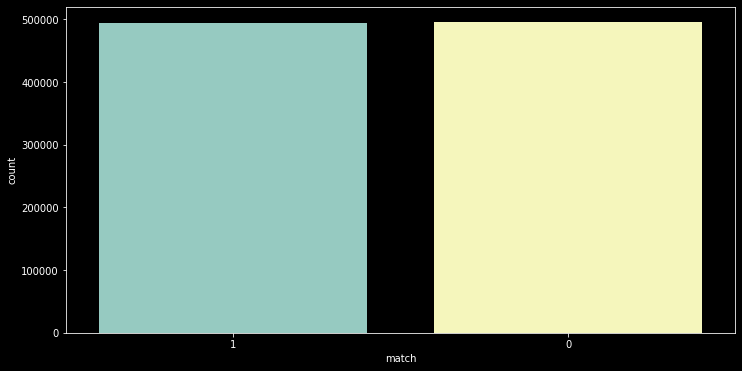

In [66]:
sns.countplot(df.match);

In [67]:
# df.to_csv('updated_pairs.csv', index = False)